# Statistical tools
This package provides functions and classes to solve several statistical problems in High Energy Physics. Here, we will see how to calculate uncertainties for poissonian values. Some other classes, focused on handling probability density functions are also discussed.

In [1]:
%matplotlib inline
import hep_spt
hep_spt.set_style()
import math
import matplotlib.pyplot as plt
import numpy as np

## Uncertainties on poissonian values
There are several options for calculating poissonian uncertainties, depending if one follows a bayesian of frequentist approach. Here, we will take a look at the frequentist uncertainties and to the method based on the differential of the logarithm of likelihood, comparing them to the standard rule of $\sqrt{n}$, which is only valid when the central limit theorem applies to our values.

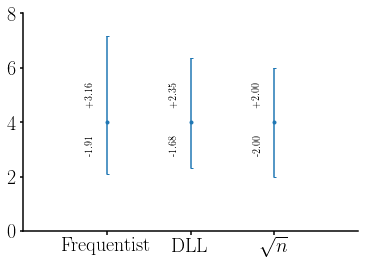

In [2]:
value = 4

# Frequentist
fu_l, fu_h = hep_spt.poisson_fu(value)
# Differential logarithm of likelihood
du_l, du_h = hep_spt.poisson_llu(value)
# Usual approach sqrt(n)
su = math.sqrt(value)

# Plot the results
errs = np.array([(fu_l, fu_h), (du_l, du_h), (su, su)])

x = np.arange(1, len(errs) + 1)
y = value*np.ones(len(errs))

plt.errorbar(x, y, yerr=errs.T, ls='none', marker='o');
plt.xticks(x, ['Frequentist', 'DLL', '$\sqrt{n}$']);
plt.gca().set_xlim([0, len(errs) + 1]);
plt.gca().set_ylim([0, 8]);

for ix, iy, (l, h) in zip(x, y, errs):
    plt.gca().annotate('-{:.2f}'.format(l), (ix - 0.25, iy - 0.5), rotation=90, va='top')
    plt.gca().annotate('+{:.2f}'.format(h), (ix - 0.25, iy + 0.5), rotation=90, va='bottom')

## The FlatDistTransform class
The class FlatDistTransform allows to build a method to use the inverse transform sampling theorem to transform values following a certain distribution into anothers following a flat distribution. Let's consider two different normal distributions, corresponding to two different types of data.

In [3]:
smp_a = np.random.normal(100, 5, 10000)
smp_b = np.random.normal(80, 20, 10000)

Now let's create the FlatDistTransform object, and transform the two samples.

In [4]:
trf = hep_spt.FlatDistTransform(smp_a)

t_a = trf.transform(smp_a)
t_b = trf.transform(smp_b)

The transform of "smp_a" should follow a flat distribution. Let's plot the results to check it.

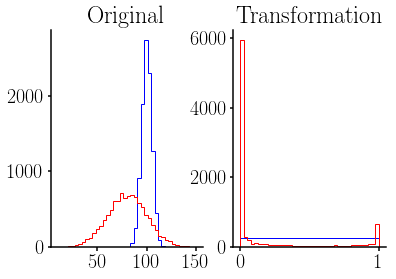

In [5]:
f, (ax0, ax1) = plt.subplots(1, 2)

cm = {'bins': 40, 'histtype': 'step'}

cm.update({'range': (10, 150)})
ax0.hist(smp_a, color='blue', **cm);
ax0.hist(smp_b, color='red', **cm);
ax0.set_title('Original');

cm.update({'range': (0, 1)})
ax1.hist(t_a, color='blue', **cm);
ax1.hist(t_b, color='red', **cm);
ax1.set_title('Transformation');